DREAM Dataset
=============

![DREAM Logo](https://github.com/dream2020/data/raw/master/images/dream.png)

Within the European research project [DREAM: Development of Robot-Enhanced therapy for children with AutisM spectrum disorders](https://dream2020.github.io/DREAM/), a large evaluation of _Robot Assisted Therapy (RAT)_ has been conducted, compared to _Standard Human Treatment (SHT)_. Both conditions follows a _Applied Behavior Analysis (ABA)_ protocol. 76 children diagnosed with _Autism Spectrum Disorders (ASD)_ participated, going through a total of 3500 therapy sessions and more than 300 hours of therapy. Each session was recorded with three RGB cameras and two RGBD (Kinect) cameras, providing detailed information of children's behavior during therapy. 

The DREAM Dataset is available at [github.com/dream2020/data](https://github.com/dream2020/data) and comprise eye-gaze and 3D skeleton data for upper body of the participating children, all recorded in a joint frame of reference. This notebook demonstrates how to read and visualize the DREAM dataset using Python 3.

The experimental setup used for all recordings in this dataset is displayed below. The red axes labeled x,y,z visualizes the coordinate system in relation to the physical environment.

![Experimental Setup](https://github.com/dream2020/data/raw/master/images/RET.jpg)

## Usage

This notebook can be read as a standard document and will provide a brief overview of how to understand the data without the need to execute any code on your own machine. However, you may also download and execute this notebook locally using [Jupyter](https://jupyter.org/). Jupyter is part of [Anaconda](https://www.anaconda.com/) and we recomment that you run this notebook through the complete Anaconda distribution.

One you have [Anaconda](https://www.anaconda.com/) installed, you may clone the DREAM dataset repository from [github.com/dream2020/data](https://github.com/dream2020/data). This notebook comes with the dataset and is opened using the [Jupyter](https://jupyter.org/) explorer.

_First, let's import the dataset tools provided with DREAM dataset..._

In [1]:
%load_ext autoreload
%autoreload 2
import dataset_tools as dataset

_Next, we import a couple of generic libraries for plotting and data handling..._

In [2]:
%matplotlib inline
import importlib
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

_Now, we are ready to load the dataset and plot it's basic JSON structure._

In [3]:
data = dataset.open('../dataset/data_example.json')
print(data.structure())

{
    "$id": "User 37_18_Intervention 2_20171102_123242.369000.json",
    "$schema": "https://raw.githubusercontent.com/dream2020/data/master/specification/dream.1.2.json",
    "ados": {
        "preTest": {
            "communication": 2,
            "interaction": 5,
            "module": 1.0,
            "play": 1,
            "protocol": "ADOS-G",
            "socialCommunicationQuestionnaire": 23,
            "stereotype": 0,
            "total": 7
        }
    },
    "condition": "RET",
    "eye_gaze": {"rx": [],"ry": [],"rz": []},
    "frame_rate": 25.1,
    "head_gaze": {"rx": [],"ry": [],"rz": []},
    "participant": {"ageInMonths": 47,"gender": "male","id": 37},
    "skeleton": {
        "elbow_left": {"confidence": [],"x": [],"y": [],"z": []},
        "elbow_right": {"confidence": [],"x": [],"y": [],"z": []},
        "hand_left": {"confidence": [],"x": [],"y": [],"z": []},
        "hand_right": {"confidence": [],"x": [],"y": [],"z": []},
        "head": {"confidence": [],"x

## Frontal view

(-300.0, 500.0, -700.0, 0.0)

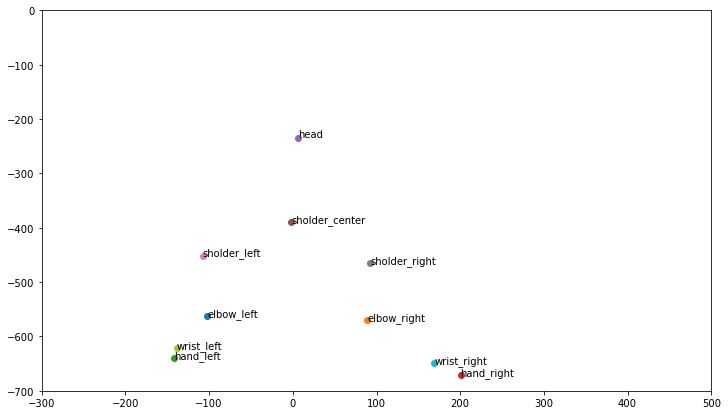

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
skeleton = data['skeleton']
frame = 25*16
for key in skeleton:
    x,y = skeleton[key]['x'][frame],skeleton[key]['y'][frame]
    ax.plot(x,y,'o')
    ax.text(x,y,key)
ax.axis([-300,500,-700,0])

## Side view

(-100.0, 1200.0, -700.0, 0.0)

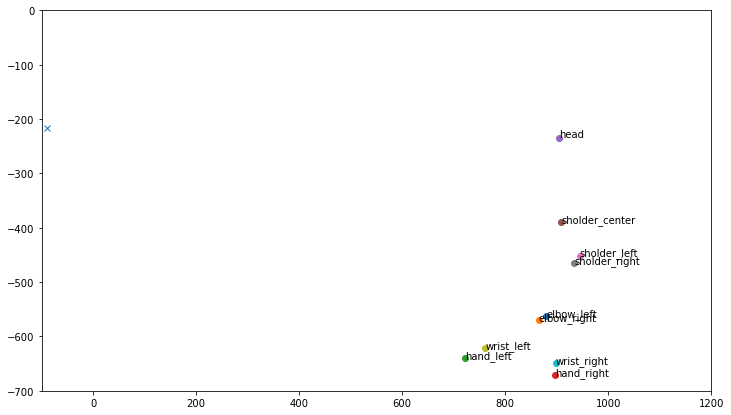

In [5]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
for key in skeleton:
    x,y = skeleton[key]['z'][frame],skeleton[key]['y'][frame]
    ax.plot(x,y,'o')
    ax.text(x,y,key)

gaze = data.gaze()[frame]
ax.plot(gaze[2],gaze[1],'x')
ax.axis([-100,1200,-700,0])

# Exporting data to other formats
The dataset tools library adds convenience methods for representing the DREAM intervention json-files as DataFrames, from which you can export the data to a variety of different formats. 

In [31]:
myDataFrame = data.to_dataFrame()

In [32]:
data.to_csv('data.csv')

## Further reading

For a more comprehensive visualization of the DREAM Dataset, please refer to the projects github page: https://github.com/dream2020/data and the [DREAM Data Visualizer](https://github.com/dream2020/DREAM-data-visualizer).